In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '2023-2024 Offense Shooting.csv'

# Read the CSV file into a pandas DataFrame
Shooting = pd.read_csv(file_path)
Situations = pd.read_csv('2023-2024 OffenseSituations.csv')
# Display the DataFrame
Shooting.head()
Situations.head()

,Date,Opponent,Rank,Result,BRM,BRA,BR%,BRnoM,BRnoA,Brno%,...,PT&BRno%,TransitionM,TransitionA,Transition%,HalfcourtM,HalfcourtA,Halfcourt%,P&R Pt,P&R Poss,P&R PPP
0,11/6/2023,Harvard,NaN,W,4.0,8.0,50.00%,12.0,24.0,50.00%,...,40.00%,21.0,35.0,60.00%,16.0,32.0,50.00%,8.0,13.0,0.615
1,11/12/2023,South Carolina,6.0,L,6.0,12.0,50.00%,17.0,42.0,40.48%,...,45.45%,5.0,18.0,27.78%,23.0,54.0,42.59%,19.0,25.0,0.760
2,11/16/2023,Uconn,8.0,L,3.0,14.0,21.43%,9.0,32.0,28.13%,...,7.69%,3.0,12.0,25.00%,12.0,46.0,26.09%,9.0,20.0,0.450
3,11/19/2023,Syracuse,NaN,W,5.0,12.0,41.67%,18.0,36.0,50.00%,...,50.00%,6.0,23.0,26.09%,23.0,48.0,47.92%,18.0,21.0,0.857
4,11/23/2023,Washington State,23.0,L,6.0,19.0,31.58%,8.0,34.0,23.53%,...,57.14%,6.0,18.0,33.33%,14.0,53.0,26.42%,8.0,17.0,0.471


In [6]:
Shooting.columns

Index(['Date', 'Opponent', 'Rank', 'Result', 'Score', 'Opp Score',
       'Point Diff', 'Layup M', 'Layup A', 'Layup%', 'Midrange M',
       'Midrange A', 'Midrange%', '3M', '3A', '3%', 'P&R Pt', 'P&R Poss',
       'P&R PPP', 'CSG Pt', 'CSG Poss', 'CSG PPP', 'CSU Pt', 'CSU Poss',
       'CSU PPP', 'DJ Pt', 'DJ Poss', 'DJ PPP2'],
      dtype='object')

In [41]:
#for wins only
# Assuming your DataFrame is named 'df'
result_w_rows = Shooting[Shooting['Result'] == 'W']
result_w_rows.head()

,Date,Opponent,Rank,Result,Score,Opp Score,Point Diff,Layup M,Layup A,Layup%,...,P&R PPP,CSG Pt,CSG Poss,CSG PPP,CSU Pt,CSU Poss,CSU PPP,DJ Pt,DJ Poss,DJ PPP
0,11/6/2023,Harvard,NaN,W,98,75,23,24,36,0.6667,...,0.615,20,14,1.429,9,8,1.125,8,9,0.889
3,11/19/2023,Syracuse,NaN,W,83,81,2,17,34,0.5000,...,0.857,6,10,0.600,3,5,0.600,10,14,0.714
5,11/24/2023,Green Bay,NaN,W,68,59,9,12,34,0.3529,...,0.500,5,6,0.833,2,7,0.286,10,14,0.714
6,11/25/2023,UMass,NaN,W,92,63,29,21,30,0.7000,...,1.167,3,7,0.429,11,11,1.000,0,5,0.000
7,11/29/2023,Niagara,NaN,W,114,44,70,29,39,0.7436,...,1.250,8,9,0.889,23,10,2.300,7,7,1.000


In [43]:
# Define predictors and target variable
predictors = ['Layup A', 'Midrange A', '3A', 'CSG Poss', 'CSU Poss',
        'DJ Poss']
target_variable = 'Point Diff'

# Add a constant term to the features
X = sm.add_constant(result_w_rows[predictors])

# Fit the OLS linear regression model
model = sm.OLS(result_w_rows[target_variable], X).fit()

# Display the summary which includes coefficients, p-values, etc.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Point Diff   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                nan
Time:                        21:24:21   Log-Likelihood:                 161.20
No. Observations:                   6   AIC:                            -310.4
Df Residuals:                       0   BIC:                            -311.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4559        inf         -0        n

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [86]:
# Merge dataframes on 'Date' and 'Opponent'
columns_to_drop = ['P&R Pt', 'P&R Poss', 'P&R PPP']
Situations = Situations.drop(columns=columns_to_drop)
combined_df = pd.merge(Shooting, Situations, on=['Date', 'Opponent', 'Rank', 'Result'])
combined_df.columns

Index(['Date', 'Opponent', 'Rank', 'Result', 'Score', 'Opp Score',
       'Point Diff', 'Layup M', 'Layup A', 'Layup%', 'Midrange M',
       'Midrange A', 'Midrange%', '3M', '3A', '3%', 'P&R Pt', 'P&R Poss',
       'P&R PPP', 'CSG Pt', 'CSG Poss', 'CSG PPP', 'CSU Pt', 'CSU Poss',
       'CSU PPP', 'DJ Pt', 'DJ Poss', 'DJ PPP', 'BRM', 'BRA', 'BR%', 'BRnoM',
       'BRnoA', 'Brno%', 'PTM', 'PTA', 'PT%', 'PTnoM', 'PTnoA', 'Ptno%',
       'PT&BRM', 'PT&BRA', 'PT&BRA%', 'PT&BRnoM', 'PT&BRnoA', 'PT&BRno%',
       'TransitionM', 'TransitionA', 'Transition%', 'HalfcourtM', 'HalfcourtA',
       'Halfcourt%'],
      dtype='object')

In [87]:
# Replace 'df' with the actual name of your DataFrame
for column in combined_df.columns:
    if '%' in column:
        combined_df[column] = combined_df[column].str.replace('%', '')
        combined_df[column] = pd.to_numeric(combined_df[column], errors='coerce')
combined_df.head()

,Date,Opponent,Rank,Result,Score,Opp Score,Point Diff,Layup M,Layup A,Layup%,...,PT&BRA%,PT&BRnoM,PT&BRnoA,PT&BRno%,TransitionM,TransitionA,Transition%,HalfcourtM,HalfcourtA,Halfcourt%
0,11/6/2023,Harvard,NaN,W,98,75,23,24,36,66.67,...,75.00,4.0,10.0,40.00,21.0,35.0,60.00,16.0,32.0,50.00
1,11/12/2023,South Carolina,6.0,L,76,114,-38,14,30,46.67,...,50.00,5.0,11.0,45.45,5.0,18.0,27.78,23.0,54.0,42.59
2,11/16/2023,Uconn,8.0,L,48,80,-32,8,24,33.33,...,25.00,1.0,13.0,7.69,3.0,12.0,25.00,12.0,46.0,26.09
3,11/19/2023,Syracuse,NaN,W,83,81,2,17,34,50.00,...,55.56,4.0,8.0,50.00,6.0,23.0,26.09,23.0,48.0,47.92
4,11/23/2023,Washington State,23.0,L,67,87,-20,4,27,14.81,...,36.36,4.0,7.0,57.14,6.0,18.0,33.33,14.0,53.0,26.42


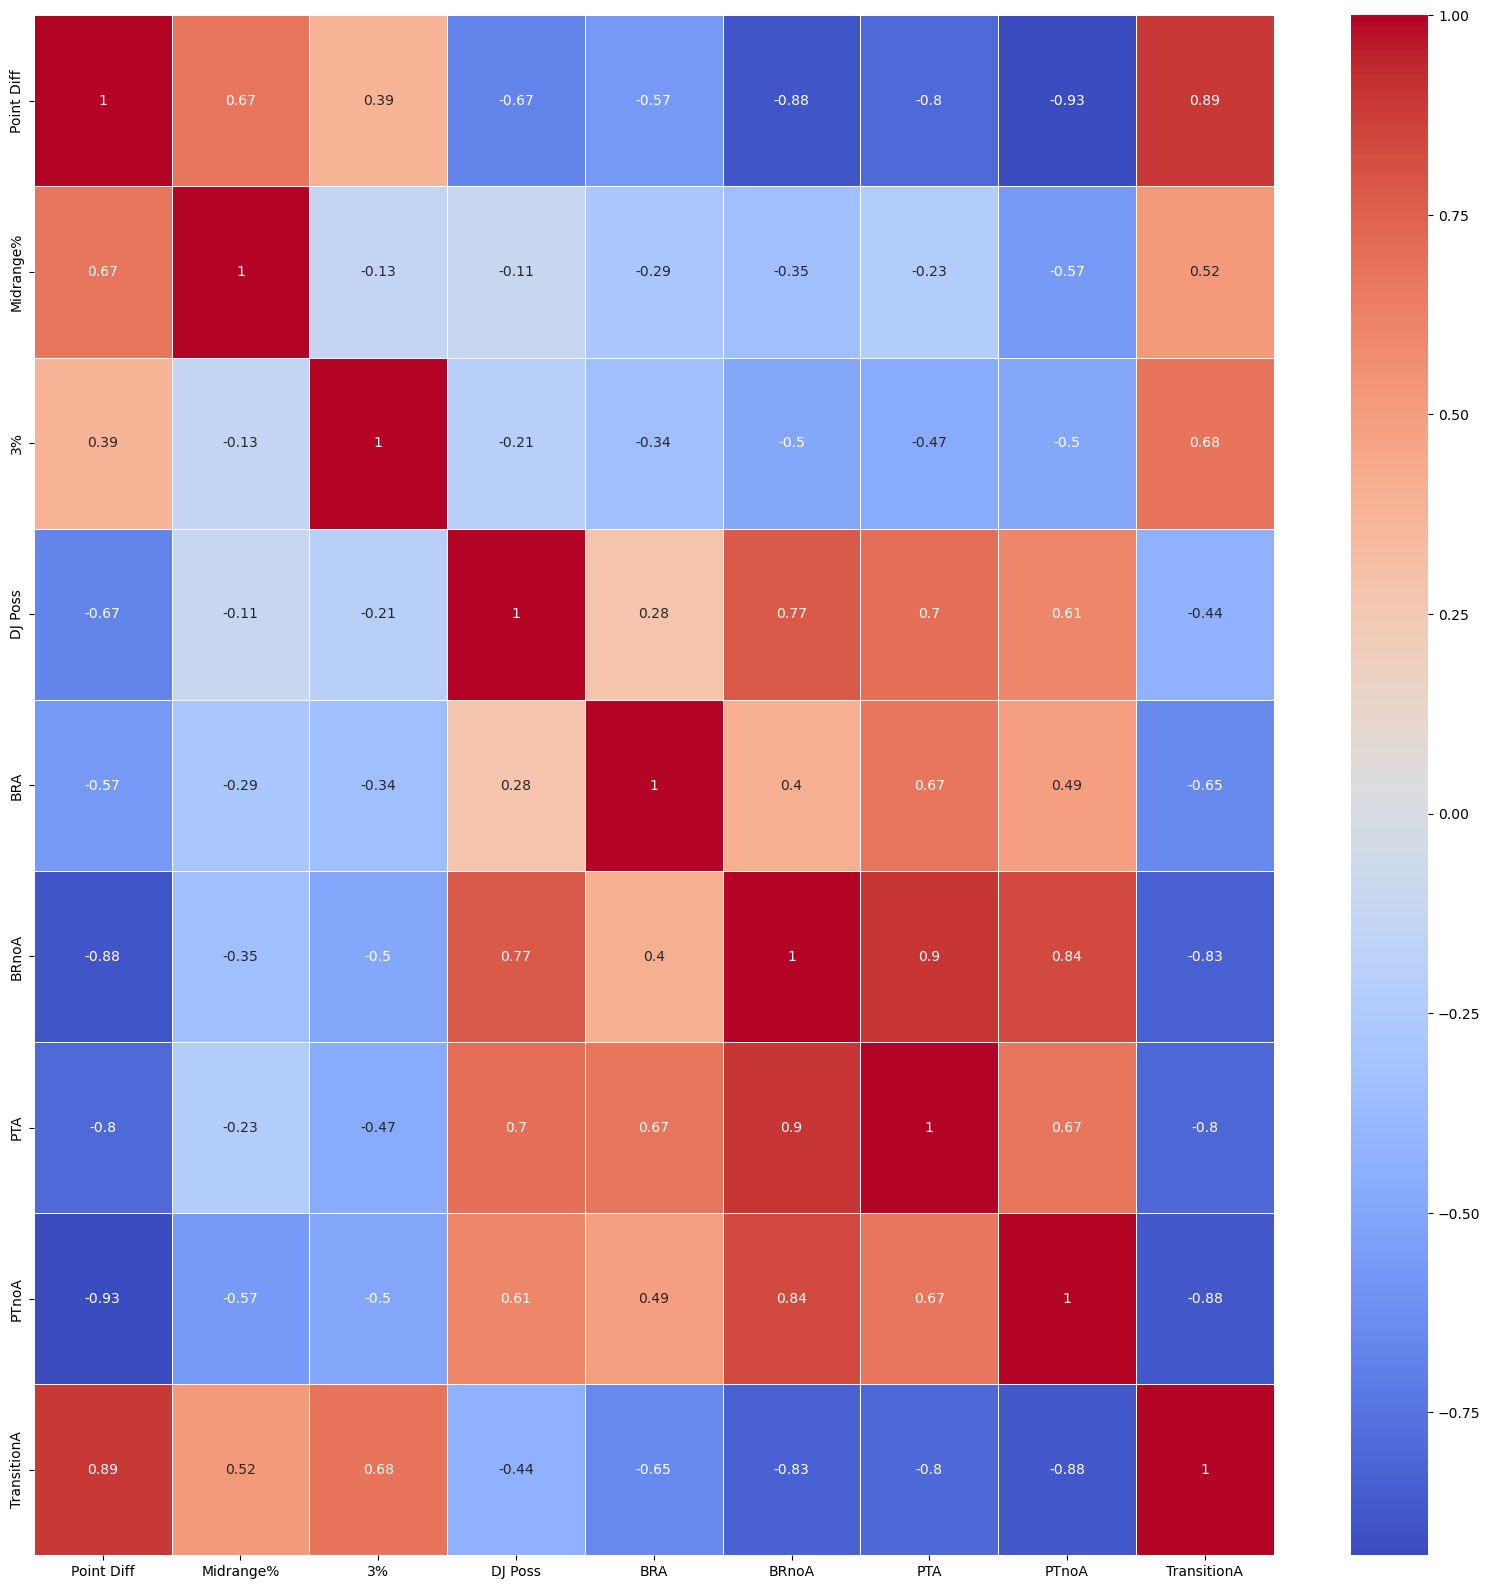

In [98]:
# Specify the specific variables for the correlation matrix
selected_variables = ['Point Diff', 'Midrange%', '3%',
        'DJ Poss','BRA','BRnoA','PTA', 'PTnoA','TransitionA']

# Create a subset DataFrame with only the selected variables
subset_df = combined_df[selected_variables]

# Create a correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20,20))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()

In [105]:
#for wins only
# Assuming your DataFrame is named 'df'
result_w = combined_df[combined_df['Result'] == 'W']
result_w.head()

# Define predictors and target variable
predictors = [
       'Midrange%', '3%', 
        'DJ Poss']
target_variable = 'Point Diff'

# Add a constant term to the features
X = sm.add_constant(combined_df[predictors])

# Fit the OLS linear regression model
model = sm.OLS(combined_df[target_variable], X).fit()

# Display the summary which includes coefficients, p-values, etc.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Point Diff   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     23.41
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00226
Time:                        22:32:27   Log-Likelihood:                -31.658
No. Observations:                   9   AIC:                             71.32
Df Residuals:                       5   BIC:                             72.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.7586     20.737     -2.255      0.0

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [106]:
#for wins only
# Assuming your DataFrame is named 'df'
result_w = combined_df[combined_df['Result'] == 'W']

# Define predictors and target variable
predictors = [
       'Midrange%', '3%', 
        'DJ Poss']
target_variable = 'Point Diff'

# Add a constant term to the features
X = sm.add_constant(result_w[predictors])

# Fit the OLS linear regression model
model = sm.OLS(result_w[target_variable], X).fit()

# Display the summary which includes coefficients, p-values, etc.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Point Diff   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     25.66
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0377
Time:                        01:24:11   Log-Likelihood:                -16.204
No. Observations:                   6   AIC:                             40.41
Df Residuals:                       2   BIC:                             39.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -171.2955     38.241     -4.479      0.0

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
